In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# Example skewed data
df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500]})

# Scaling
scaler = MinMaxScaler()
df['minmax_scaled'] = scaler.fit_transform(df[['values']])

scaler = StandardScaler()
df['standard_scaled'] = scaler.fit_transform(df[['values']])

# Transformation
df['log_transformed'] = np.log1p(df['values'])   # log(1+x) handles zeros
pt = PowerTransformer(method='yeo-johnson')
df['yeo_johnson'] = pt.fit_transform(df[['values']])

print(df.head())


   values  minmax_scaled  standard_scaled  log_transformed  yeo_johnson
0       1       0.000000        -0.555483         0.693147    -1.486260
1       2       0.002004        -0.548571         1.098612    -1.123245
2       3       0.004008        -0.541659         1.386294    -0.883327
3       4       0.006012        -0.534747         1.609438    -0.706708
4       5       0.008016        -0.527834         1.791759    -0.568261


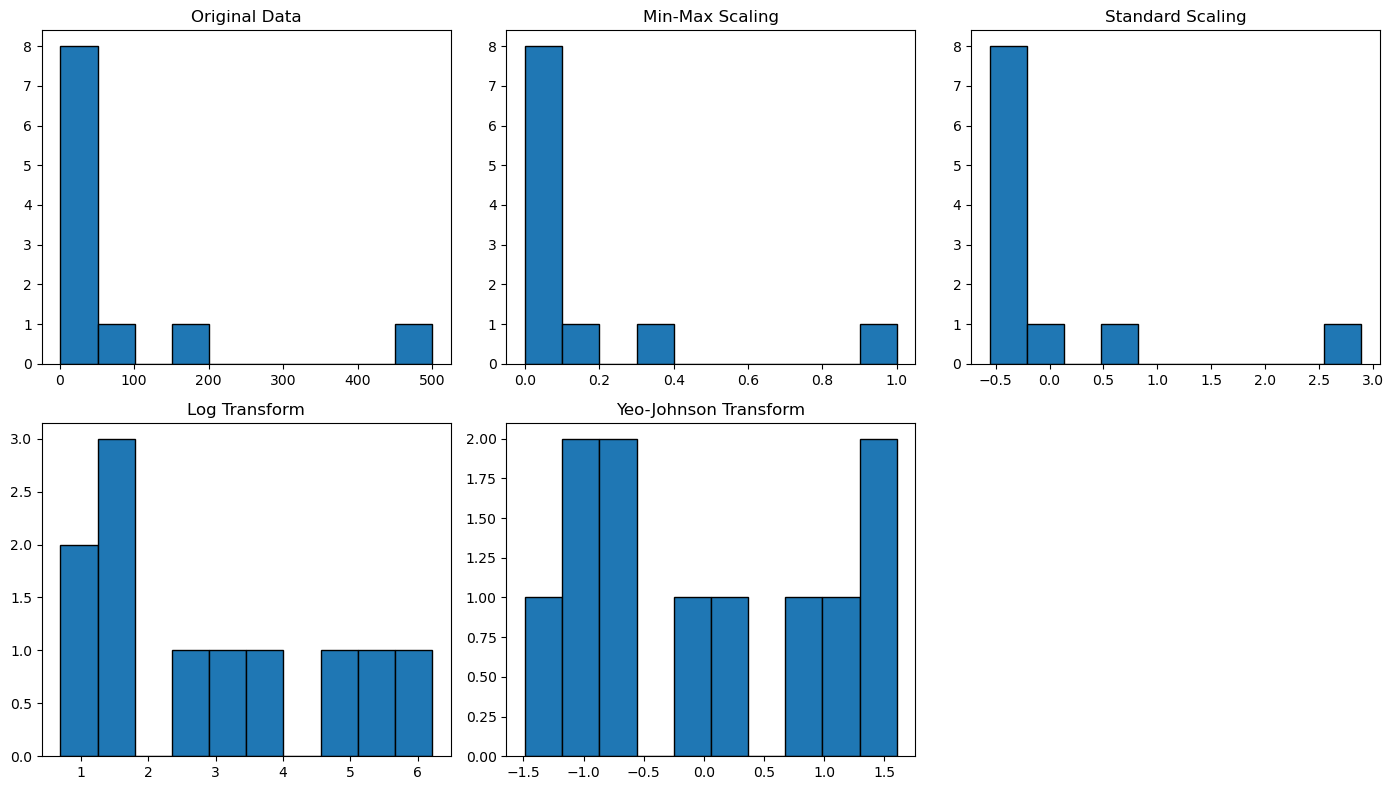

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

# Example skewed dataset
df = pd.DataFrame({'values': [1, 2, 3, 4, 5, 10, 20, 50, 100, 200, 500]})

# Scaling
minmax = MinMaxScaler()
df['minmax_scaled'] = minmax.fit_transform(df[['values']])

standard = StandardScaler()
df['standard_scaled'] = standard.fit_transform(df[['values']])

# Transformation
df['log_transformed'] = np.log1p(df['values'])   # log(1+x) to avoid issues with zero
pt = PowerTransformer(method='yeo-johnson')
df['yeo_johnson'] = pt.fit_transform(df[['values']])

# Plot
plt.figure(figsize=(14,8))

# Original
plt.subplot(2,3,1)
plt.hist(df['values'], bins=10, edgecolor='black')
plt.title("Original Data")

# Min-Max Scaling
plt.subplot(2,3,2)
plt.hist(df['minmax_scaled'], bins=10, edgecolor='black')
plt.title("Min-Max Scaling")

# Standard Scaling
plt.subplot(2,3,3)
plt.hist(df['standard_scaled'], bins=10, edgecolor='black')
plt.title("Standard Scaling")

# Log Transform
plt.subplot(2,3,4)
plt.hist(df['log_transformed'], bins=10, edgecolor='black')
plt.title("Log Transform")

# Yeo-Johnson Transform
plt.subplot(2,3,5)
plt.hist(df['yeo_johnson'], bins=10, edgecolor='black')
plt.title("Yeo-Johnson Transform")

plt.tight_layout()
plt.show()
